# **Preparatory**

## **Compute SPEI**

In [2]:
suppressMessages(library(SPEI))

In [4]:
sapply(c("mswep", "chirps"), function(ds) {
    df = read.csv(paste0("data/", ds, "_monthly.csv"))
    df_ts <- ts(df$pr, start = sapply(strsplit(df$time[1], "-")[[1]], as.integer)[1:2], frequency = 12)
    res_df <- sapply(c(1,3,6,12,24), function(nm) {
        spi_m <- spi(df_ts, scale = nm, ref.start = c(1990,1), ref.end = c(2020,12))
        spi_m$fitted
    })
    write.csv(setNames(data.frame(df$time, res_df), c("time", "spi_1", "spi_3", "spi_6", "spi_12", "spi_24")), file = paste0("data/",ds,"_spi-monthly.csv"), row.names = F)
})

$mswep
NULL

$chirps
NULL

---
# **Fitted models**

# **Precipitation**

In [41]:
mswep = read.csv(paste0("data/mswep_monthly.csv"))
mswep$pr6m = filter(mswep$pr, rep(1,6), sides = 1)
mswep$year <- as.integer(substr(mswep$time,1,4))
mswep$month <- as.integer(substr(mswep$time,6,7))

nino <- read.csv("data/nino34rel_accum.csv")
nino$year <- as.integer(substr(nino$time,1,4))
nino$month <- as.integer(substr(nino$time,6,7))

gmst <- read.fwf("../../Data/gmst.dat", comment.char = "#", widths = c(5,15), col.names = c("year", "gmst"))

In [102]:
m <- 3
df_m <- merge(merge(mswep[mswep$month == m, c("year", "pr6m")], nino[nino$month == m, c("year", "nino6")]), gmst)
df_m <- df_m[!is.na(rowSums(df_m)),]

lm_nada <- lm(pr6m ~ 1, df_m)
lm_gmst <- lm(pr6m ~ gmst, df_m)
lm_nino <- lm(pr6m ~ nino6, df_m)
lm_gmst_nino <- lm(pr6m ~ gmst + nino6, df_m)

In [103]:
# close enough to normal?
ks.test(scale(df_m$pr6m), pnorm)


	Exact one-sample Kolmogorov-Smirnov test

data:  scale(df_m$pr6m)
D = 0.14513, p-value = 0.2838
alternative hypothesis: two-sided


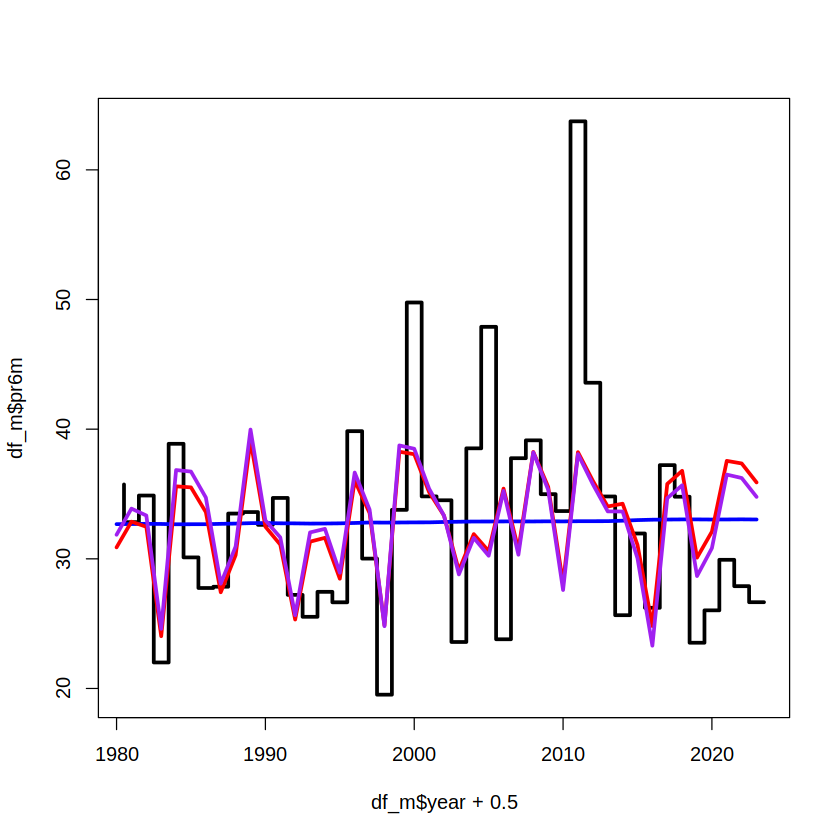

In [104]:
plot(df_m$year+0.5, df_m$pr6m, type = "S", lwd = 3)

lines(df_m$year, fitted(lm_gmst), col = "blue", lwd = 3)
lines(df_m$year, fitted(lm_nino), col = "red", lwd = 3)
lines(df_m$year, fitted(lm_gmst_nino), col = "purple", lwd = 3)

In [105]:
anova(lm_nada, lm_gmst, test = "LRT")
anova(lm_nada, lm_nino, test = "LRT")

,Res.Df,RSS,Df,Sum of Sq,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,43,2803.691,NA,NA,NA
2,42,2803.025,1,0.6650933,0.9204809


,Res.Df,RSS,Df,Sum of Sq,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,43,2803.691,NA,NA,NA
2,42,2128.257,1,675.4335,0.0002612892


In [106]:
anova(lm_nino, lm_gmst_nino, test = "LRT")

,Res.Df,RSS,Df,Sum of Sq,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,42,2128.257,NA,NA,NA
2,41,2101.974,1,26.28279,0.4739904


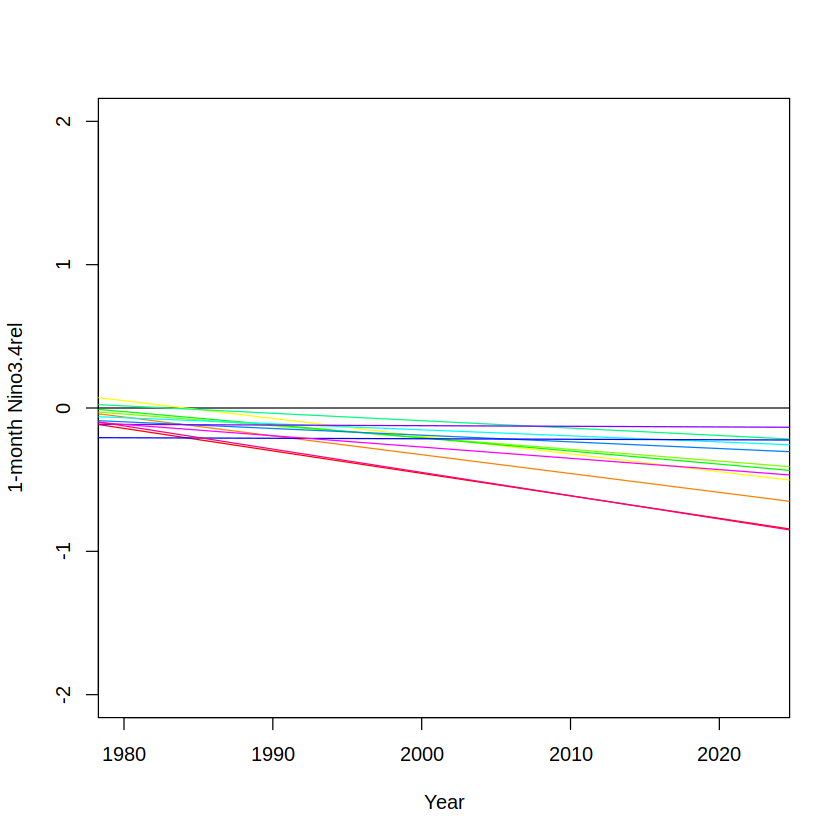

In [117]:
m <- 3
df_m <- merge(merge(mswep[mswep$month == m, c("year", "pr6m")], nino[nino$month == m, c("year", "nino6")]), gmst)

cols <- rainbow(12)
plot(0, type = "n", xlim = c(1980, 2023), ylim = c(-2,2), xlab = "Year", ylab = "1-month Nino3.4rel")
abline(h = 0, col = "black")
invisible(sapply(1:12, function(i) {
    
    abline(line(nino[nino$month == i, c("year", "nino1")]), col = cols[i])
}))
# decreasing trend in Nino3.4rel. Possibly due to over-zealous detrending?

In [114]:
line(nino[nino$month == 1, c("year", "nino1")])


Call:
line(nino[nino$month == 1, c("year", "nino1")])

Coefficients:
[1]  30.92292  -0.01569
